# VR Experience Recommendation System

This notebook demonstrates how to build a **content-based recommendation system** for VR experiences. We will explore how to recommend similar VR experiences based on features like **Duration**, **Motion Sickness**, and **Immersion Level**. Additionally, we will visualize the data using histograms, scatter plots, and a heatmap of cosine similarity scores.

---

## 1. **Loading and Exploring the Dataset**

We begin by loading the dataset and exploring its structure.

In [113]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

In [115]:
# Import necessary libraries
import pandas as pd

# Load the dataset
data = pd.read_csv('data/data.csv')

# Display the first few rows of the dataset
data.head()

,UserID,Age,Gender,VRHeadset,Duration,MotionSickness,ImmersionLevel
0,1,40,Male,HTC Vive,13.598508,8,5
1,2,43,Female,HTC Vive,19.950815,2,2
2,3,27,Male,PlayStation VR,16.543387,4,2
3,4,33,Male,HTC Vive,42.574083,6,3
4,5,51,Male,PlayStation VR,22.452647,4,2


## 2. Data Preprocessing: Standardizing Features
Before calculating the cosine similarity between experiences, we standardize the numeric features to ensure that all variables contribute equally to the similarity calculation.

In [159]:

# Feature Selection: Select the relevant features for similarity calculation
features = data[['Duration', 'MotionSickness', 'ImmersionLevel']]  # These are numeric features

# Step 1: Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features

array([[-1.20444391,  0.8634675 ,  1.43642804],
       [-0.80129627, -1.23063315, -0.69266491],
       [-1.01754785, -0.5325996 , -0.69266491],
       ...,
       [ 0.31729072,  0.51445073, -0.69266491],
       [-0.31790688,  0.51445073, -0.69266491],
       [ 0.31316565,  0.51445073,  0.01703274]])

We use StandardScaler to standardize the features (Duration, Motion Sickness, Immersion Level), ensuring that each feature has a mean of 0 and a standard deviation of 1. This helps to avoid any bias toward features with larger numerical ranges.

## 3. Clustering Similar VR Experiences
We apply KMeans clustering to group similar VR experiences together based on the features. This helps us understand how experiences are distributed and identify clusters that may show similar characteristics.

In [163]:
from sklearn.cluster import KMeans

# Step 2: Apply KMeans clustering to group similar experiences
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

# Display the first few rows of the clustered data
data.head()


,UserID,Age,Gender,VRHeadset,Duration,MotionSickness,ImmersionLevel,Cluster
0,1,40,Male,HTC Vive,13.598508,8,5,2
1,2,43,Female,HTC Vive,19.950815,2,2,3
2,3,27,Male,PlayStation VR,16.543387,4,2,3
3,4,33,Male,HTC Vive,42.574083,6,3,0
4,5,51,Male,PlayStation VR,22.452647,4,2,3


We use KMeans clustering to group VR experiences into 5 clusters based on the features. This allows us to observe patterns within similar experiences.

## 4. Cosine Similarity Calculation
Now, we calculate the cosine similarity between VR experiences to determine how similar they are based on their features. We then visualize this similarity using a heatmap. Since the dataset may have too many experiences to visualize clearly, we sample a subset of 30 experiences to make the heatmap more interpretable.

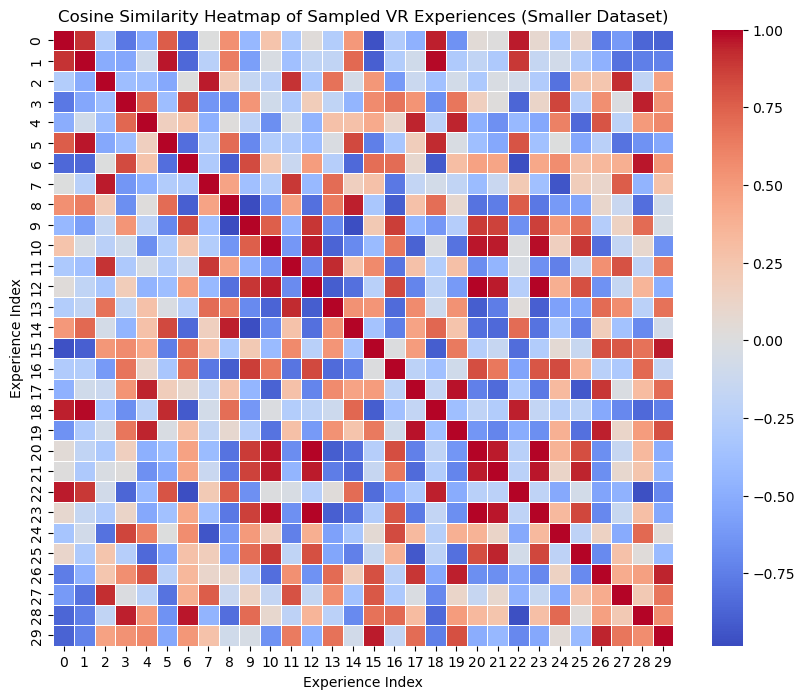

In [167]:
# Step 3: Sample a smaller subset of the dataset for better visualization
sampled_data = data.sample(n=30, random_state=42)

# Using only the sampled data for cosine similarity
sampled_features = sampled_data[['Duration', 'MotionSickness', 'ImmersionLevel']]
scaled_sampled_features = scaler.fit_transform(sampled_features)

# Step 4: Compute cosine similarity on the sampled data
cosine_sim_sampled_small = cosine_similarity(scaled_sampled_features)

# Plotting the heatmap for the smaller sampled data
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_sim_sampled_small, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title('Cosine Similarity Heatmap of Sampled VR Experiences (Smaller Dataset)')
plt.xlabel('Experience Index')
plt.ylabel('Experience Index')
plt.show()

By sampling 30 experiences from the dataset, we reduce the size of the cosine similarity matrix and make the heatmap clearer. This allows us to better understand the relationships between the experiences.

## 6. Visualizing the Distributions of Key Features
We visualize the distribution of key features such as Duration, Motion Sickness, and Immersion Level to better understand the range and spread of the data.

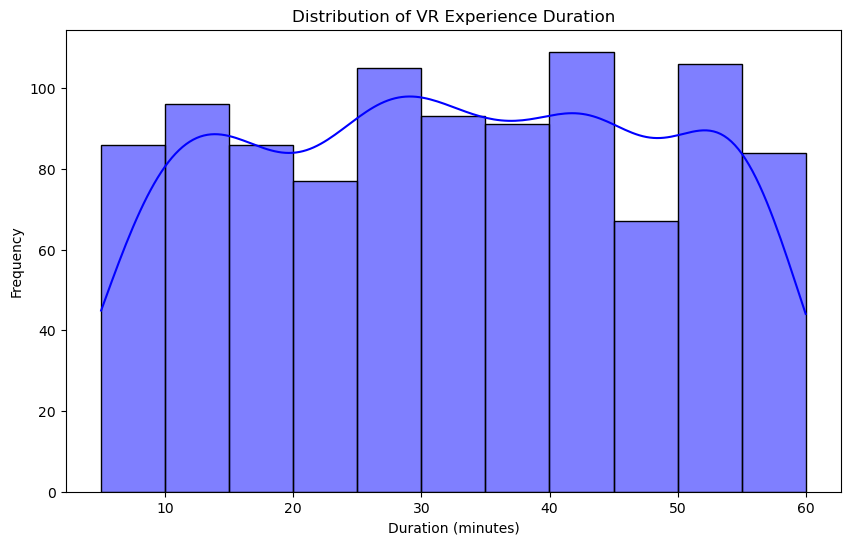

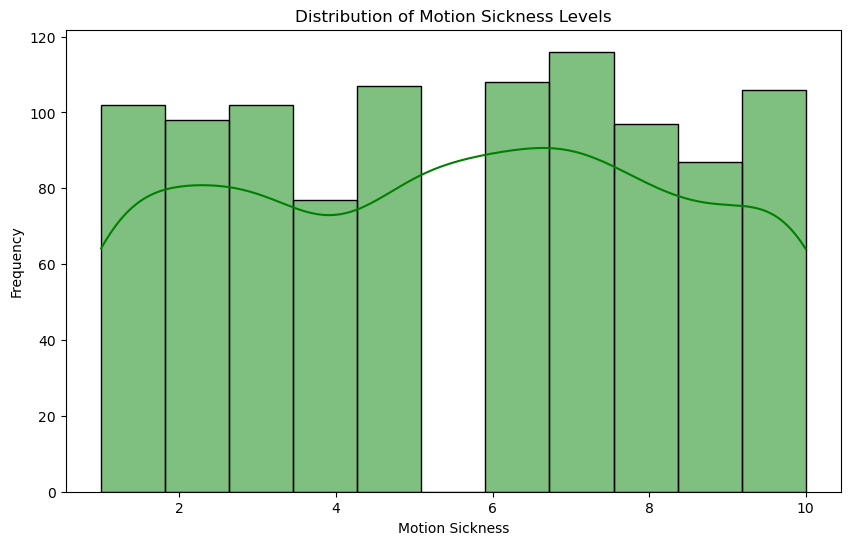

In [171]:
# 1. Distribution of Duration
plt.figure(figsize=(10, 6))
sns.histplot(data['Duration'], kde=True, color='blue')
plt.title('Distribution of VR Experience Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

# 2. Distribution of Motion Sickness
plt.figure(figsize=(10, 6))
sns.histplot(data['MotionSickness'], kde=True, color='green')
plt.title('Distribution of Motion Sickness Levels')
plt.xlabel('Motion Sickness')
plt.ylabel('Frequency')
plt.show()


The histograms show the distribution of Duration and Motion Sickness across all experiences. This helps to identify if the data is skewed or if there are any outliers that could affect similarity calculations.



---
In this notebook, we've built a VR experience recommendation system using cosine similarity and KMeans clustering. By visualizing the data and its relationships, we gained insights into the similarities between VR experiences. The recommendation system can be further refined by incorporating more sophisticated techniques such as collaborative filtering or hybrid models.